
Created on Thur Sep  14 00:25:54 2023
@author: Fernandez, Maria Giselle

Cite this work: Fernández-Godino, M. G. (2023). Review of multi-fidelity models. arXiv preprint arXiv:1609.07196.


# # Multi-Fidelity Modeling Toy Problem 3: MultiFidelityModel Class Documentation

## Overview

The `MultiFidelityModel` class encapsulates the functionality for generating a Multi-Fidelity Surrogate Model (MFSM). It aims to synergize high-fidelity model (HFM) and low-fidelity model (LFM) data to create a more accurate and computationally efficient model.

## Dependencies

- matplotlib.pyplot: Used for plotting.
- numpy: For numerical operations.
- sklearn.svm.SVR: For Support Vector Regression.
- sklearn.ensemble.RandomForestRegressor: For Random Forest Regression.

## Class Attributes

- `x`: Numpy array consisting of 100 points linearly spaced between 0 and 1.
- `nLF`: Integer, number of LFM samples.
- `nHF`: Integer, number of HFM samples.
- `svr`: Object of class `SVR`, used for the Support Vector Regression model.
- `rf`: Object of class `RandomForestRegressor`, used for the Random Forest model.

### Methods

#### `__init__(self, x, nLF, nHF)`

Initializes class instance variables.

- **Parameters:**
  - `nLF`: Number of Low-Fidelity Model samples.
  - `nHF`: Number of High-Fidelity Model samples.

#### `func_HF(x)`

Static method representing the high-fidelity function.

- **Parameters:**
  - `x`: Input variable values (Numpy ndarray).
- **Returns:**
  - Output response values (Numpy ndarray).

#### `func_LF(x)`

Static method representing the low-fidelity function.

- **Parameters:**
  - `x`: Input variable values (Numpy ndarray).
- **Returns:**
  - Output response values (Numpy ndarray).

#### `generate_data(self)`

Generates random sampling points for LFM and HFM and calculates corresponding function values.

#### `fit_SVR(self)`

Fits the SVR model to approximate the discrepancy between HFM and LFM.

#### `fit_RF(self)`

Fits the Random Forest model to the low-fidelity data, thus building the Low-Fidelity Surrogate Model (LFSM).

#### `y_MFSM_A(self, x)`

Calculates the integrated surrogate model using Option A.

- **Parameters:**
  - `x`: Input variable values (Numpy ndarray).
- **Returns:**
  - Output response values (Numpy ndarray).

#### `y_MFSM_B(self, x)`

Calculates the integrated surrogate model using Option B.

- **Parameters:**
  - `x`: Input variable values (Numpy ndarray).
- **Returns:**
  - Output response values (Numpy ndarray).

#### `plot(self)`

Generates a plot to visualize the actual LFM, HFM, and MFSM estimates. The plot also displays the discrepancy between the models.

## Example Usage

```python
if __name__ == "__main__":
    model = MultiFidelityModel(x=1000, nLF=200, nHF=20)
    model.generate_data()
    model.fit_SVR()
    model.fit_RF()
    model.plot()
```

This example initializes a `MultiFidelityModel` with 200 LFM samples and 20 HFM samples. Subsequently, it generates data, fits the SVR and RF models, and plots the outcomes.

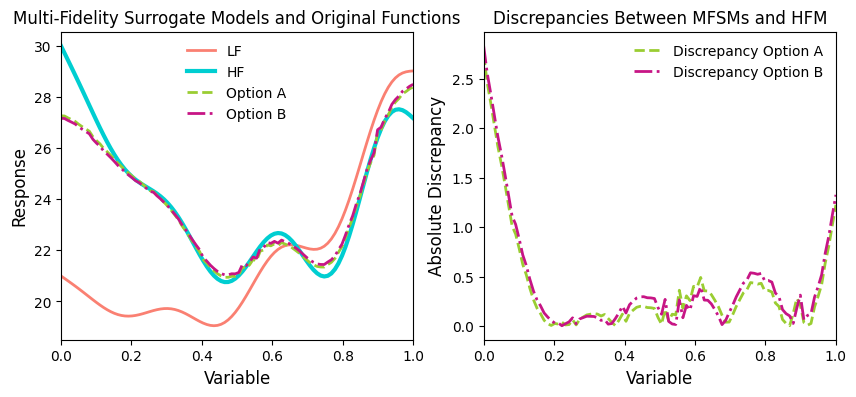

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RF

class MultiFidelityModel:
    """Class to encapsulate the functionality of the Multi-Fidelity Surrogate Model (MFSM)."""

    def __init__(self, x, nLF, nHF):
        """Initialize the sample sizes, models, and random seed.
        Parameters:
        - nLF (int): Number of Low-Fidelity Model (LFM) samples.
        - nHF (int): Number of High-Fidelity Model (HFM) samples.
        """
        self.x = np.linspace(0,1,100)  # Generate an array of 100 points, linearly spaced between the lower and upper bounds
        self.nLF = nLF
        self.nHF = nHF
        self.svr = SVR(kernel='rbf')  # Initialize the Support Vector Regression model
        self.rf = RF()  # Initialize the Random Forest model
        np.random.seed(7)  # Seed for reproducibility

    @staticmethod
    def func_HF(x):
        """High-fidelity function representing computationally expensive objective function.
        Parameters:
        - x (numpy.ndarray): Input variable values.
        Returns:
        - numpy.ndarray: Corresponding objective function values.
        """
        return 2 * x * np.sin(20 * x + 2) + 10 * np.exp(x) + 20 * (x - 1)**2
    
    @staticmethod
    def func_LF(x):
        """Low-fidelity function approximating the high-fidelity function but with lower computational cost.
        Parameters:
        - x (numpy.ndarray): Input variable values.
        Returns:
        - numpy.ndarray: Corresponding objective function values.
        """
        return 1.4 * x * np.sin(20 * x + 2) + 7 * np.exp(x) + 14 * (x - 1)**2 + 10 * x

    def generate_data(self):
        """Generate random sampling points for LFM and HFM and evaluate corresponding function values."""
        self.x_HFM = np.sort(np.random.rand(self.nHF))  # Random sampling points for HFM
        self.x_LFM = np.sort(np.random.rand(self.nLF))  # Random sampling points for LFM
        self.y_HFM = self.func_HF(self.x_HFM)  # Evaluate HFM at sample points
        self.y_LFM = self.func_LF(self.x_LFM)  # Evaluate LFM at sample points

    def fit_SVR(self):
        """Fit Support Vector Regression model to approximate the discrepancy between HFM and LFM."""
        discrepancy_y = self.y_HFM - self.func_LF(self.x_HFM)  # Calculate discrepancy
        self.svr.fit(self.x_HFM.reshape(-1, 1), discrepancy_y)  # Fit SVR model

    def fit_RF(self):
        """Fit Random Forest model to the low-fidelity data to build Low-Fidelity Surrogate Model (LFSM)."""
        self.rf.fit(self.x_LFM.reshape(-1, 1), self.y_LFM)  # Fit RF model

    def y_MFSM_A(self, x):
        """Integrate SVR and Random Forest models by addition.
        Parameters:
        - x (numpy.ndarray): Input variable values.
        Returns:
        - numpy.ndarray: Estimated HFM values using Option A.
        """
        return self.rf.predict(x.reshape(-1, 1)) + self.svr.predict(x.reshape(-1, 1))
    
    def y_MFSM_B(self, x):
        """Constructs Multi-Fidelity Surrogate Model (MFSM) using Option B.
        Parameters:
        - x (numpy.ndarray): Input variable values for Option B MFSM.
        Returns:
        - numpy.ndarray: Output response values based on the Option B MFSM.
        """
        x_LF_alone = np.sort(np.random.rand(self.nLF).reshape(-1, 1)) # Generate random sample points exclusively for LFM.
        discrepancy_LFM_est = self.svr.predict(x_LF_alone.reshape(-1, 1))  # Applying SM to get the estimated discrepancy for LFM-only points
        svr2 = SVR()  # Initialize a new SVR model for Option B
        svr2.fit(x_LF_alone.reshape(-1, 1), discrepancy_LFM_est)  # Train SVR model on low-fidelity-only points
        return self.rf.predict(x.reshape(-1, 1)) + svr2.predict(x.reshape(-1, 1))   # Apply Option B
    
    def plot(self):
        """Generate a plot to visualize the HFM, LFM, and MFSM estimates."""
        # Existing plotting code for primary functions
        plt.figure(figsize=[10, 4])
        plt.subplot(1, 2, 1)  # First subplot for original models
        plt.plot(self.x, self.func_LF(self.x), c='salmon', linewidth=2, label='LF')
        plt.plot(self.x, self.func_HF(self.x), c='darkturquoise', linewidth=3, label='HF')
        plt.plot(self.x, self.y_MFSM_A(self.x), '--', c='yellowgreen', linewidth=2, label='Option A')
        plt.plot(self.x, self.y_MFSM_B(self.x), '-.', c='mediumvioletred', linewidth=2, label='Option B')
        plt.xlim([0, 1])
        plt.legend(frameon=False, fontsize=10)
        plt.xlabel('Variable', fontsize=12)
        plt.ylabel('Response', fontsize=12)
        plt.title('Multi-Fidelity Surrogate Models and Original Functions')

        # New subplot for discrepancy
        plt.subplot(1, 2, 2)  # Second subplot for discrepancies
        discrepancy_A = np.abs(self.func_HF(self.x) - self.y_MFSM_A(self.x))
        discrepancy_B = np.abs(self.func_HF(self.x) - self.y_MFSM_B(self.x))
        plt.plot(self.x, discrepancy_A, '--', c='yellowgreen', linewidth=2, label='Discrepancy Option A')
        plt.plot(self.x, discrepancy_B, '-.', c='mediumvioletred', linewidth=2, label='Discrepancy Option B')
        plt.xlim([0, 1])
        plt.legend(frameon=False, fontsize=10)
        plt.xlabel('Variable', fontsize=12)
        plt.ylabel('Absolute Discrepancy', fontsize=12)
        plt.title('Discrepancies Between MFSMs and HFM')

        # Displaying the plot (or save it)
        # plt.show()
        plt.savefig('multiple_choice_with_discrepancy.png', dpi=1000, bbox_inches='tight', transparent=True)


# Execute if run as main
if __name__ == "__main__":
    model = MultiFidelityModel(x=1000, nLF=200, nHF=20)  # Initialize class instance with 200 LFM samples and 20 HFM samples
    model.generate_data()  # Generate data
    model.fit_SVR()  # Fit SVR model
    model.fit_RF()  # Fit RF model
    model.plot()  # Generate plot
